<center>
<h1> Housing Prices Linear Regression
</center>

#### Steps for Regression Modeling:
1. Business problem definition - Perform exploratory data analysis to identify the initial patterns in this data i.e. identification of outliers, missing values, univariate, and bivariate patterns. Check multicollinearity among independent variables.Use OLS Regression to see price predictors.
2. convert business problem into statistical problem  sales = F(sales attributes, product features, marketing info etc.)
3. Finding the right technique - Since it is predicting value (Regression Problem) problem so we can use OLS as one of the technique. We can also use other techniques like Decision Trees, Ensemble learning, KNN, SVM, ANN etc.
4. Data colletion(Y, X) - Identify the sources of information and collect the data
5. Consolidate the data - aggregate and consolidate the data at Model level/customer level/store level depends on business problem
6. Data preparation for modeling (create data audit report to identify the steps to perform as part of data preparation)
    a. missing value treatment
    b. outlier treatment
    c. dummy variable creation
7. Variable creation by using transformation and derived variable creation.
8. Basic assumptions (Normality, linearity, no outliers, homoscadasticity, no pattern in residuals, no auto correlation etc)
9. Variable reduction techniques (removing multicollinerity with the help of FA/PCA, correlation matrics, VIF)
10. Create dev and validation data sets (50:50 if you have more data else 70:30 or 80:20)
11. Modeling on dev data set (identify significant variables, model interpretation, check the signs and coefficients, multi-collinierity check, measures of good neess fit, final mathematical equation etc)
12. validating on validation data set (check the stability of model, scoring, decile analysis, cross validation etc.)
13. Output interpretation and derive insights (understand the limitations of the model and define strategy to implementation)
14. convert statistical solution into business solutions (implementation, model monitoring etc)

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)
%pylab inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)
%pylab inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

D:\D Drive\Software\Anaconda\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "D:\D Drive\Software\Anaconda\lib\runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "D:\D Drive\Software\Anaconda\lib\runpy.py", line 72, in _run_code
    exec code in run_globals
  File "D:\D Drive\Software\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "D:\D Drive\Software\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "D:\D Drive\Software\Anaconda\lib\site-packages\ipykernel\kernelapp.py", line 478, in start
    s

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import imputation
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import  Lasso, Ridge, ElasticNet
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

D:\D Drive\Software\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
os.chdir("D:\\AnalytixLabs\\Machine Learning\\Class 1-2(11&12) ( BA Classes)\\Case Study - House Price Prediction")

In [5]:
house_prices = pd.read_table("House_Prices.csv", sep = ',')

In [6]:
house_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
Home            128 non-null int64
Price           128 non-null int64
SqFt            128 non-null int64
Bedrooms        128 non-null int64
Bathrooms       128 non-null int64
Offers          128 non-null int64
Brick           128 non-null object
Neighborhood    128 non-null object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


In [7]:
house_prices.describe()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,64.500000,130427.343750,2000.937500,3.023438,2.445312,2.578125
std,37.094474,26868.770371,211.572431,0.725951,0.514492,1.069324
min,1.000000,69100.000000,1450.000000,2.000000,2.000000,1.000000
25%,32.750000,111325.000000,1880.000000,3.000000,2.000000,2.000000
50%,64.500000,125950.000000,2000.000000,3.000000,2.000000,3.000000
75%,96.250000,148250.000000,2140.000000,3.000000,3.000000,3.000000
max,128.000000,211200.000000,2590.000000,5.000000,4.000000,6.000000


In [8]:
house_prices.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [9]:
house_prices.columns

Index([u'Home', u'Price', u'SqFt', u'Bedrooms', u'Bathrooms', u'Offers',
       u'Brick', u'Neighborhood'],
      dtype='object')

In [10]:
house_prices.dtypes

Home             int64
Price            int64
SqFt             int64
Bedrooms         int64
Bathrooms        int64
Offers           int64
Brick           object
Neighborhood    object
dtype: object

In [11]:
numeric_var_names=[key for key in dict(house_prices.dtypes) if dict(house_prices.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(house_prices.dtypes) if dict(house_prices.dtypes)[key] in ['object']]
print(numeric_var_names)
print(cat_var_names)

['Bathrooms', 'Price', 'Bedrooms', 'Offers', 'Home', 'SqFt']
['Neighborhood', 'Brick']


In [12]:
house_prices_num=house_prices[numeric_var_names]
house_prices_num.head(5)

,Bathrooms,Price,Bedrooms,Offers,Home,SqFt
0,2,114300,2,2,1,1790
1,2,114200,4,3,2,2030
2,2,114800,3,1,3,1740
3,2,94700,3,3,4,1980
4,3,119800,3,3,5,2130


In [13]:
# Another way to fetch only numerical data from a table.
house_prices_num=house_prices._get_numeric_data()
house_prices_num.head(5)

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
0,1,114300,1790,2,2,2
1,2,114200,2030,4,2,3
2,3,114800,1740,3,2,1
3,4,94700,1980,3,2,3
4,5,119800,2130,3,3,3


In [15]:
house_prices_cat = house_prices[cat_var_names]
house_prices_cat.head(5)

,Neighborhood,Brick
0,East,No
1,East,No
2,East,No
3,East,No
4,East,No


In [16]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=house_prices_num.apply(lambda x: var_summary(x)).T

In [17]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Home,128.0,0.0,8256.0,64.500000,64.5,37.094474,1.376000e+03,1.0,2.27,7.35,13.7,32.75,64.5,96.25,115.3,121.65,126.73,128.0
Price,128.0,0.0,16694700.0,130427.343750,125950.0,26868.770371,7.219308e+08,69100.0,81570.00,91310.00,102020.0,111325.00,125950.0,148250.00,166560.0,179465.00,196476.00,211200.0
SqFt,128.0,0.0,256120.0,2000.937500,2000.0,211.572431,4.476289e+04,1450.0,1530.80,1664.00,1720.0,1880.00,2000.0,2140.00,2250.0,2368.00,2505.70,2590.0
Bedrooms,128.0,0.0,387.0,3.023438,3.0,0.725951,5.270054e-01,2.0,2.00,2.00,2.0,3.00,3.0,3.00,4.0,4.00,4.73,5.0
Bathrooms,128.0,0.0,313.0,2.445312,2.0,0.514492,2.647023e-01,2.0,2.00,2.00,2.0,2.00,2.0,3.00,3.0,3.00,3.00,4.0
Offers,128.0,0.0,330.0,2.578125,3.0,1.069324,1.143455e+00,1.0,1.00,1.00,1.0,2.00,3.0,3.00,4.0,4.00,5.00,6.0


In [18]:
#num_summary.to_csv('num_summary.csv')

In [19]:
# Another way to fetch only objects from a tables.
house_prices_cat=house_prices.select_dtypes(include=['object'])

In [20]:
house_prices_cat.head()

,Brick,Neighborhood
0,No,East
1,No,East
2,No,East
3,No,East
4,No,East


In [21]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=house_prices_cat.apply(lambda x: cat_summary(x))

In [22]:
cat_summary

,Brick,Neighborhood
N,128,128
NMISS,0,0
ColumnsNames,"No 86 Yes 42 Name: Brick, dtype: int64",East 45 North 44 West 39 Name: Neig...


In [23]:
#Detailed profiling using pandas profiling

pandas_profiling.ProfileReport(house_prices)

Number of variables,8
Number of observations,128
Total Missing (%),0.0%
Total size in memory,8.1 KiB
Average record size in memory,64.0 B
Numeric,6
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [24]:
#Handling Outliers - Method1
house_prices['Price']= house_prices['Price'].clip_upper(house_prices['Price'].quantile(0.99)) 
house_prices['Price']= house_prices['Price'].clip_lower(house_prices['Price'].quantile(0.01)) 


In [25]:
num_summary=house_prices_num.apply(lambda x: var_summary(x)).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Home,128.0,0.0,8256.0,64.500000,64.5,37.094474,1.376000e+03,1.0,2.27,7.35,13.7,32.75,64.5,96.25,115.3,121.65,126.73,128.0
Price,128.0,0.0,16694700.0,130427.343750,125950.0,26868.770371,7.219308e+08,69100.0,81570.00,91310.00,102020.0,111325.00,125950.0,148250.00,166560.0,179465.00,196476.00,211200.0
SqFt,128.0,0.0,256120.0,2000.937500,2000.0,211.572431,4.476289e+04,1450.0,1530.80,1664.00,1720.0,1880.00,2000.0,2140.00,2250.0,2368.00,2505.70,2590.0
Bedrooms,128.0,0.0,387.0,3.023438,3.0,0.725951,5.270054e-01,2.0,2.00,2.00,2.0,3.00,3.0,3.00,4.0,4.00,4.73,5.0
Bathrooms,128.0,0.0,313.0,2.445312,2.0,0.514492,2.647023e-01,2.0,2.00,2.00,2.0,2.00,2.0,3.00,3.0,3.00,3.00,4.0
Offers,128.0,0.0,330.0,2.578125,3.0,1.069324,1.143455e+00,1.0,1.00,1.00,1.0,2.00,3.0,3.00,4.0,4.00,5.00,6.0


In [26]:
#Handling Missings
# Fill with mean
house_prices['Price']=house_prices['Price'].fillna(house_prices['Price'].mean())

In [27]:
num_summary=house_prices_num.apply(lambda x: var_summary(x)).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Home,128.0,0.0,8256.0,64.500000,64.5,37.094474,1.376000e+03,1.0,2.27,7.35,13.7,32.75,64.5,96.25,115.3,121.65,126.73,128.0
Price,128.0,0.0,16694700.0,130427.343750,125950.0,26868.770371,7.219308e+08,69100.0,81570.00,91310.00,102020.0,111325.00,125950.0,148250.00,166560.0,179465.00,196476.00,211200.0
SqFt,128.0,0.0,256120.0,2000.937500,2000.0,211.572431,4.476289e+04,1450.0,1530.80,1664.00,1720.0,1880.00,2000.0,2140.00,2250.0,2368.00,2505.70,2590.0
Bedrooms,128.0,0.0,387.0,3.023438,3.0,0.725951,5.270054e-01,2.0,2.00,2.00,2.0,3.00,3.0,3.00,4.0,4.00,4.73,5.0
Bathrooms,128.0,0.0,313.0,2.445312,2.0,0.514492,2.647023e-01,2.0,2.00,2.00,2.0,2.00,2.0,3.00,3.0,3.00,3.00,4.0
Offers,128.0,0.0,330.0,2.578125,3.0,1.069324,1.143455e+00,1.0,1.00,1.00,1.0,2.00,3.0,3.00,4.0,4.00,5.00,6.0


## Handling categorical features

scikit-learn expects all features to be numeric. So how do we include a categorical feature in our model?

- **Ordered categories:** transform them to sensible numeric values (example: small=1, medium=2, large=3)
- **Unordered categories:** use dummy encoding (0/1)

What are the categorical features in our dataset?

- **Ordered categories:** weather (already encoded with sensible numeric values)
- **Unordered categories:** season (needs dummy encoding), holiday (already dummy encoded), workingday (already dummy encoded)

For season, we can't simply leave the encoding as 1 = spring, 2 = summer, 3 = fall, and 4 = winter, because that would imply an **ordered relationship**. Instead, we create **multiple dummy variables:**

In [28]:
house_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
Home            128 non-null int64
Price           128 non-null float64
SqFt            128 non-null int64
Bedrooms        128 non-null int64
Bathrooms       128 non-null int64
Offers          128 non-null int64
Brick           128 non-null object
Neighborhood    128 non-null object
dtypes: float64(1), int64(5), object(2)
memory usage: 8.1+ KB


In [29]:
# Creating dummy variables in a dataframe for all the categorical variables.
house_prices_cat=pd.get_dummies(house_prices_cat)
house_prices_cat.head()

# Another way to create dummies for categorical variables in a dataframe.
#pd.concat([pd.get_dummies(house_prices_cat[col]) for col in house_prices_cat], axis=1, keys=house_prices_cat.columns)

,Brick_No,Brick_Yes,Neighborhood_East,Neighborhood_North,Neighborhood_West
0,1,0,1,0,0
1,1,0,1,0,0
2,1,0,1,0,0
3,1,0,1,0,0
4,1,0,1,0,0


In [30]:
house_prices_new = pd.concat([house_prices_num, house_prices_cat], axis=1)

In [31]:
house_prices_new.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick_No,Brick_Yes,Neighborhood_East,Neighborhood_North,Neighborhood_West
0,1,114300,1790,2,2,2,1,0,1,0,0
1,2,114200,2030,4,2,3,1,0,1,0,0
2,3,114800,1740,3,2,1,1,0,1,0,0
3,4,94700,1980,3,2,3,1,0,1,0,0
4,5,119800,2130,3,3,3,1,0,1,0,0


### Checking for normality

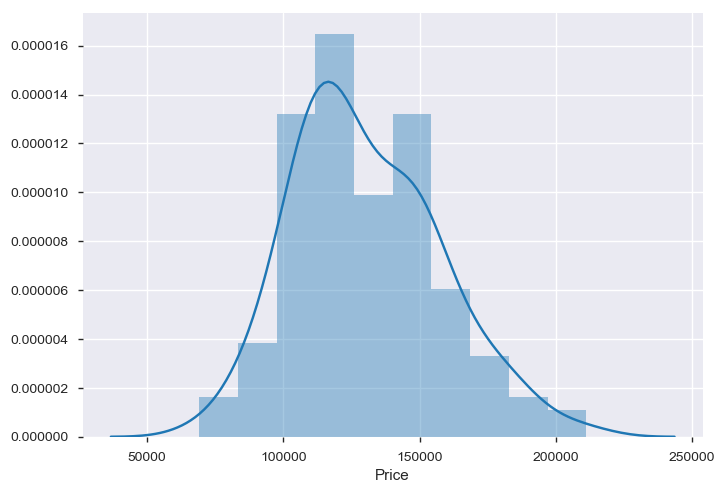

In [32]:
import seaborn as sns
sns.distplot(house_prices_new.Price)

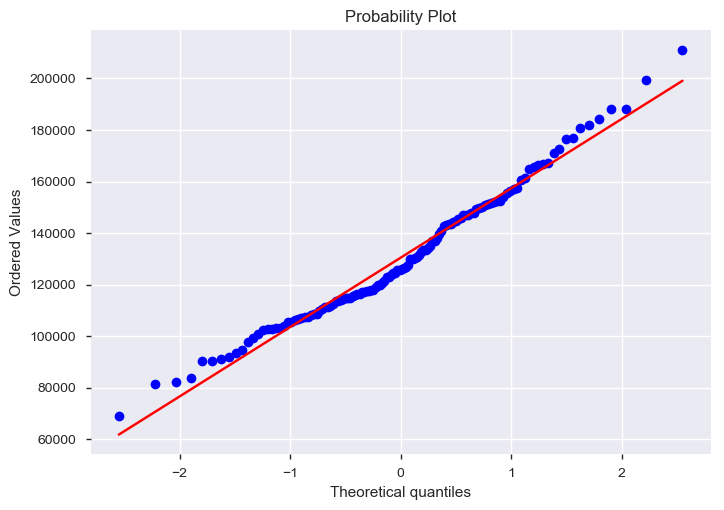

In [33]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

fig = plt.figure()
res = stats.probplot(house_prices_new['Price'], plot=plt)
plt.show()

In [34]:
house_prices_new["ln_Price"]= np.log(house_prices_new["Price"]+1)

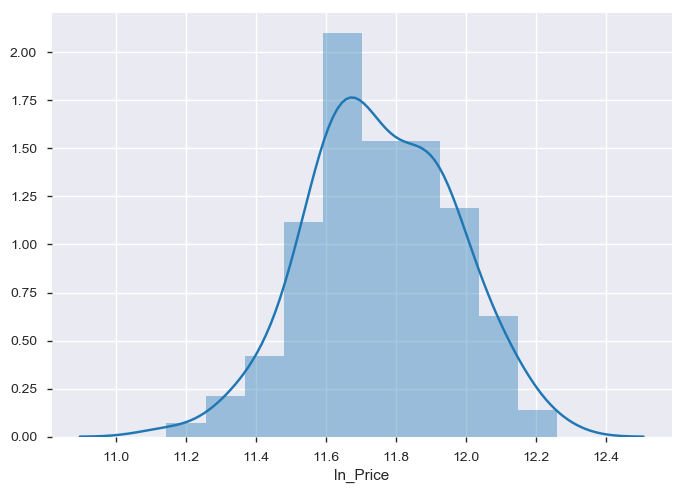

In [35]:
sns.distplot(house_prices_new.ln_Price)

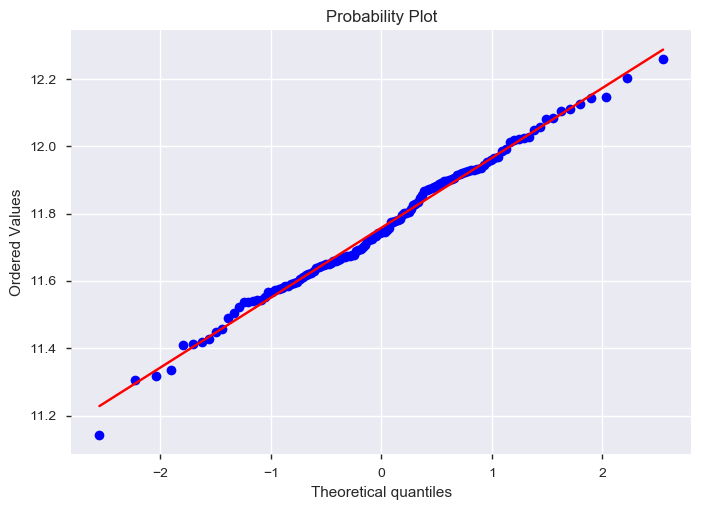

In [36]:
fig = plt.figure()
res = stats.probplot(house_prices_new['ln_Price'], plot=plt)
plt.show()

In [37]:
house_prices_new=house_prices_new.drop(['Price'],axis=1)

In [38]:
house_prices_new.columns

Index([u'Home', u'SqFt', u'Bedrooms', u'Bathrooms', u'Offers', u'Brick_No',
       u'Brick_Yes', u'Neighborhood_East', u'Neighborhood_North',
       u'Neighborhood_West', u'ln_Price'],
      dtype='object')

In [39]:
house_prices_new.corr()

,Home,SqFt,Bedrooms,Bathrooms,Offers,Brick_No,Brick_Yes,Neighborhood_East,Neighborhood_North,Neighborhood_West,ln_Price
Home,1.000000,0.168553,-0.068568,0.127694,-0.053597,-0.037376,0.037376,-0.075505,0.049859,0.026873,0.111704
SqFt,0.168553,1.000000,0.483807,0.522745,0.336923,-0.079792,0.079792,0.045639,-0.288886,0.250759,0.556572
Bedrooms,-0.068568,0.483807,1.000000,0.414556,0.114271,-0.046380,0.046380,-0.091750,-0.364667,0.471477,0.508153
Bathrooms,0.127694,0.522745,0.414556,1.000000,0.143793,-0.171977,0.171977,-0.001247,-0.275830,0.285923,0.508113
Offers,-0.053597,0.336923,0.114271,0.143793,1.000000,0.144986,-0.144986,-0.015602,0.332987,-0.327425,-0.326332
Brick_No,-0.037376,-0.079792,-0.046380,-0.171977,0.144986,1.000000,-1.000000,-0.147564,0.260554,-0.115793,-0.442163
Brick_Yes,0.037376,0.079792,0.046380,0.171977,-0.144986,-1.000000,1.000000,0.147564,-0.260554,0.115793,0.442163
Neighborhood_East,-0.075505,0.045639,-0.091750,-0.001247,-0.015602,-0.147564,0.147564,1.000000,-0.532910,-0.487421,-0.107585
Neighborhood_North,0.049859,-0.288886,-0.364667,-0.275830,0.332987,0.260554,-0.260554,-0.532910,1.000000,-0.479098,-0.559956
Neighborhood_West,0.026873,0.250759,0.471477,0.285923,-0.327425,-0.115793,0.115793,-0.487421,-0.479098,1.000000,0.689422


In [40]:
corr_matrix=house_prices_new.corr()

In [41]:
#corr_matrix.to_csv('corr_matrix.csv')

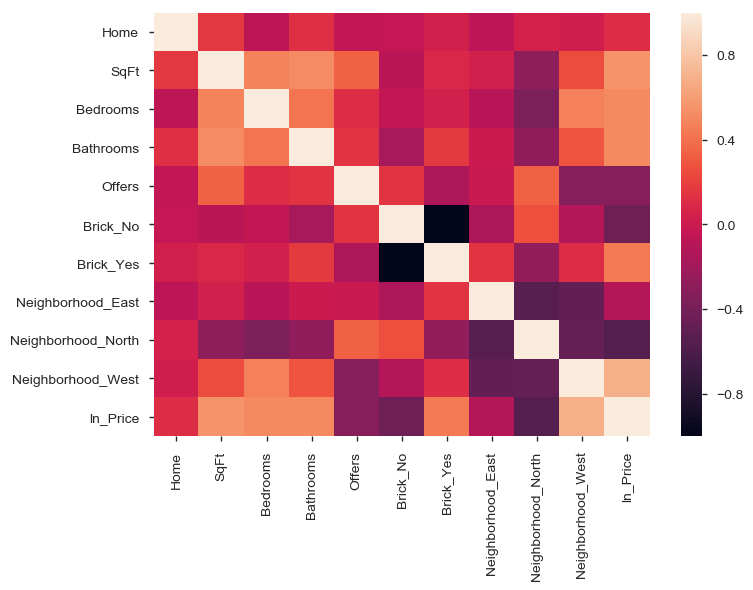

In [42]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(house_prices_new.corr())

In [43]:
np.corrcoef(house_prices_new.ln_Price, house_prices_new.Neighborhood_West)[1][0]

0.6894218478131153

In [44]:
def linear_relations(x):
    log_x = np.log(x+1)
    exp_x = np.exp(x)
    sqrt_x = np.sqrt(x)
    squre_x = x*x
    coeff = np.corrcoef(house_prices_new.ln_Price, x)[1][0]
    log_coeff = np.corrcoef(house_prices_new.ln_Price, log_x)[1][0]
    sqrt_coeff = np.corrcoef(house_prices_new.ln_Price, exp_x)[1][0]
    exp_coeff = np.corrcoef(house_prices_new.ln_Price, sqrt_x)[1][0]
    squre_coeff = np.corrcoef(house_prices_new.ln_Price, squre_x)[1][0]
    return pd.Series([coeff,log_coeff, sqrt_coeff, exp_coeff, squre_coeff], 
                  index=['coeff','log_coeff', 'sqrt_coeff', 'exp_coeff', 'squre_coeff'])
    

In [45]:
correlations_summary =house_prices_new.apply(linear_relations).T

D:\D Drive\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
D:\D Drive\Software\Anaconda\lib\site-packages\numpy\lib\function_base.py:3103: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


In [46]:
correlations_summary.to_csv('correlations_summary.csv')

In [47]:
correlations_summary

,coeff,log_coeff,sqrt_coeff,exp_coeff,squre_coeff
Home,0.111704,0.138851,0.009874,0.128030,0.079018
SqFt,0.556572,0.557198,NaN,0.557321,0.552546
Bedrooms,0.508153,0.492416,0.484414,0.498205,0.518845
Bathrooms,0.508113,0.505569,0.506215,0.506414,0.510827
Offers,-0.326332,-0.327363,-0.245086,-0.328172,-0.310627
Brick_No,-0.442163,-0.442163,-0.442163,-0.442163,-0.442163
Brick_Yes,0.442163,0.442163,0.442163,0.442163,0.442163
Neighborhood_East,-0.107585,-0.107585,-0.107585,-0.107585,-0.107585
Neighborhood_North,-0.559956,-0.559956,-0.559956,-0.559956,-0.559956
Neighborhood_West,0.689422,0.689422,0.689422,0.689422,0.689422


In [48]:
#Splitting the data

feature_columns = house_prices_new.columns.difference( ['ln_Price'] )
feature_columns

Index([u'Bathrooms', u'Bedrooms', u'Brick_No', u'Brick_Yes', u'Home',
       u'Neighborhood_East', u'Neighborhood_North', u'Neighborhood_West',
       u'Offers', u'SqFt'],
      dtype='object')

In [49]:
from sklearn.model_selection import train_test_split
train ,test = train_test_split(house_prices_new,test_size=0.3,random_state = 123 ) 

## Form of linear regression

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

The $\beta$ values are called the **model coefficients**:

- These values are estimated (or "learned") during the model fitting process using the **least squares criterion**.
- Specifically, we are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors").
- And once we've learned these coefficients, we can use the model to predict the response.

![Estimating coefficients](images/estimating_coefficients.png)

In the diagram above:

- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the vertical distances between the observed values and the least squares line.

In [50]:
import statsmodels.formula.api as smf

In [51]:
train.columns= [phrase.strip().replace('-', '') for phrase in train.columns]
train.columns

Index([u'Home', u'SqFt', u'Bedrooms', u'Bathrooms', u'Offers', u'Brick_No',
       u'Brick_Yes', u'Neighborhood_East', u'Neighborhood_North',
       u'Neighborhood_West', u'ln_Price'],
      dtype='object')

In [52]:
all_columns = "+".join(train.columns.difference( ['ln_Price'] ))

print(all_columns)

Bathrooms+Bedrooms+Brick_No+Brick_Yes+Home+Neighborhood_East+Neighborhood_North+Neighborhood_West+Offers+SqFt


In [53]:
my_formula = "ln_Price~" + all_columns

print(my_formula)

ln_Price~Bathrooms+Bedrooms+Brick_No+Brick_Yes+Home+Neighborhood_East+Neighborhood_North+Neighborhood_West+Offers+SqFt


In [54]:
import statsmodels.formula.api as smf

lm=smf.ols(formula=my_formula, data=train).fit()
#lm=smf.ols('ln_Price~Bathrooms+Bedrooms+Brick_No+Brick_Yes+Home+Neighborhood_East+Neighborhood_North+Neighborhood_West+Offers+SqFt', train).fit()

In [55]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_Price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     58.87
Date:                Sun, 23 Sep 2018   Prob (F-statistic):           2.35e-30
Time:                        23:57:26   Log-Likelihood:                 101.58
No. Observations:                  89   AIC:                            -185.2
Df Residuals:                      80   BIC:                            -162.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.9272      0

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [57]:
my_formula = 'ln_Price~Bathrooms+Brick_Yes+Neighborhood_West'

In [58]:
y, X = dmatrices(my_formula, train, return_type='dataframe')

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif.round(1)

,VIF Factor,features
0,24.2,Intercept
1,1.1,Bathrooms
2,1.0,Brick_Yes
3,1.1,Neighborhood_West


In [59]:
lm1=smf.ols('ln_Price~Bathrooms+Brick_Yes+Neighborhood_West', train).fit()

In [60]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_Price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     63.56
Date:                Sun, 23 Sep 2018   Prob (F-statistic):           1.19e-21
Time:                        23:59:03   Log-Likelihood:                 68.074
No. Observations:                  89   AIC:                            -128.1
Df Residuals:                      85   BIC:                            -118.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            11.3206      0.06

In [61]:
test.head(5)

,Home,SqFt,Bedrooms,Bathrooms,Offers,Brick_No,Brick_Yes,Neighborhood_East,Neighborhood_North,Neighborhood_West,ln_Price
4,5,2130,3,3,3,1,0,1,0,0,11.693587
123,124,1900,3,3,3,0,1,1,0,0,11.692752
90,91,1920,4,2,2,1,0,0,0,1,11.871306
82,83,2050,2,2,1,0,1,0,0,1,12.012494
42,43,1990,2,2,3,1,0,1,0,0,11.567423


In [62]:
test.columns= [phrase.strip().replace('-', '') for phrase in test.columns]
test.columns

Index([u'Home', u'SqFt', u'Bedrooms', u'Bathrooms', u'Offers', u'Brick_No',
       u'Brick_Yes', u'Neighborhood_East', u'Neighborhood_North',
       u'Neighborhood_West', u'ln_Price'],
      dtype='object')

In [63]:
train_pred = lm.predict(train)

In [64]:
train_pred.head(5)

79     11.824594
104    11.490049
60     12.054501
21     11.559093
11     11.740534
dtype: float64

In [65]:
# calculate these metrics by hand for training!
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(train.ln_Price, train_pred))
print('MSE:', metrics.mean_squared_error(train.ln_Price, train_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(train.ln_Price, train_pred)))
print('R-Squre:', metrics.r2_score(train.ln_Price, train_pred))
print('corr between actual & pred:', np.corrcoef(train.ln_Price, train_pred)[1][0])

('MAE:', 0.05835172389453305)
('MSE:', 0.005972084218390003)
('RMSE:', 0.07727926124381627)
('R-Squre:', 0.854799042990271)
('corr between actual & pred:', 0.9245534289538221)


In [66]:
train['train_pred'] = lm.predict(train)

D:\D Drive\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [67]:
test['test_pred'] = lm.predict(test)
test.head()

D:\D Drive\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Home,SqFt,Bedrooms,Bathrooms,Offers,Brick_No,Brick_Yes,Neighborhood_East,Neighborhood_North,Neighborhood_West,ln_Price,test_pred
4,5,2130,3,3,3,1,0,1,0,0,11.693587,11.738839
123,124,1900,3,3,3,0,1,1,0,0,11.692752,11.733529
90,91,1920,4,2,2,1,0,0,0,1,11.871306,11.820569
82,83,2050,2,2,1,0,1,0,0,1,12.012494,12.037442
42,43,1990,2,2,3,1,0,1,0,0,11.567423,11.587529


In [68]:
train['Deciles']=pd.qcut(train['train_pred'],10, labels=False)
test['Deciles']=pd.qcut(test['test_pred'],10, labels=False)

D:\D Drive\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\D Drive\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [69]:
train[['Deciles','ln_Price', 'train_pred']].groupby(train.Deciles).mean()

,Deciles,ln_Price,train_pred
Deciles,,,
0,0,11.453976,11.464802
1,1,11.552582,11.535111
2,2,11.563715,11.602977
3,3,11.621092,11.631233
4,4,11.741518,11.682669
5,5,11.707269,11.739516
6,6,11.817203,11.798272
7,7,11.871415,11.851031
8,8,11.907447,11.929961


In [70]:
test[['Deciles','ln_Price', 'test_pred']].groupby(test.Deciles).mean()

,Deciles,ln_Price,test_pred
Deciles,,,
0,0,11.482675,11.486967
1,1,11.621478,11.581514
2,2,11.685390,11.673112
3,3,11.744215,11.722128
4,4,11.781313,11.765664
5,5,11.884432,11.836664
6,6,11.895892,11.911854
7,7,11.972470,11.998567
8,8,11.971928,12.031440


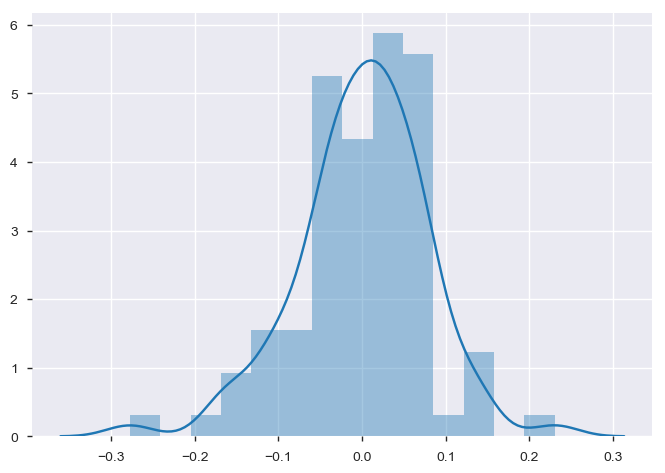

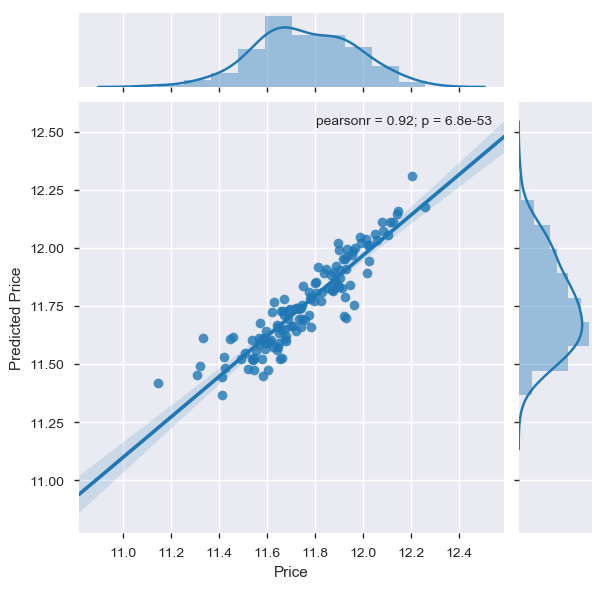

In [71]:
sns.distplot(lm.resid)

(sns.jointplot(x = house_prices_new.ln_Price, y = lm.predict(house_prices_new), kind="reg").set_axis_labels("Price","Predicted Price"))